# ProblemStatment 1: Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
crime_df = pd.read_csv('crime_data.csv')
crime_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime_df = crime_df.rename({'Unnamed: 0':'State'},axis=1)
crime_df.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
report = pp.ProfileReport(crime_df)
report.to_widgets()

In [12]:
0 in crime_df

False

In [15]:
(crime_df == 0).sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [21]:
#Standardising the data
crime_df1 = crime_df.iloc[:,1:].values
scalar = StandardScaler().fit(crime_df1)
scaledvalues = scalar.transform(crime_df1)
scaled_crimedf = pd.DataFrame(scaledvalues,columns = ['Murder','Assault','UrbanPop','Rape'])
scaled_crimedf.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


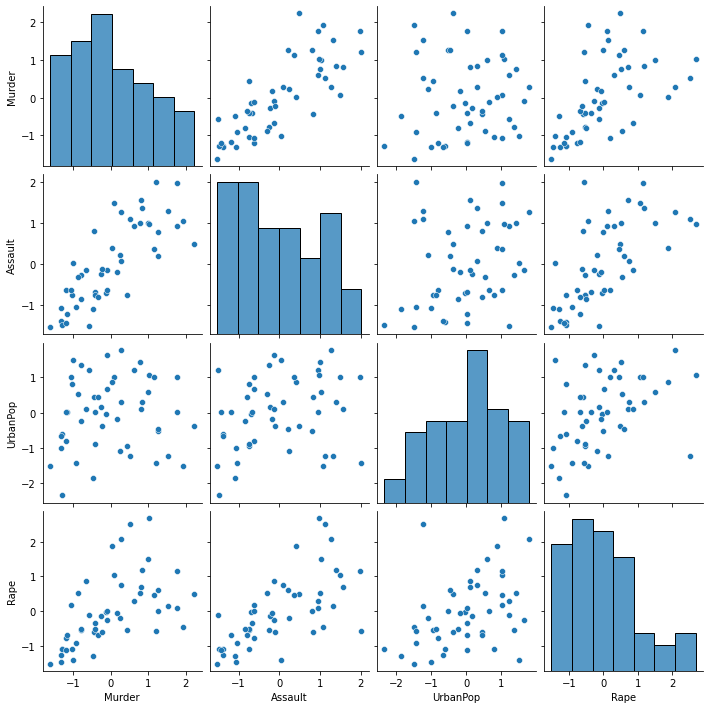

In [46]:
sns.pairplot(scaled_crimedf)

In [47]:
scaled_crimedf.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


## Hierarchical Cluster

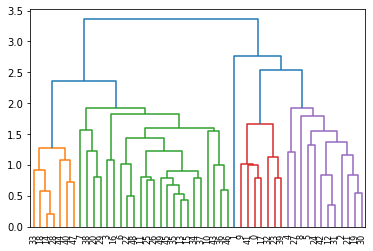

In [27]:
#dengrogram 
dend = sch.dendrogram(sch.linkage(scaled_crimedf,method='average'))

In [31]:
#AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,linkage='average',affinity='euclidean')

In [32]:
hc.compute_full_tree

'auto'

In [33]:
hc.get_params

<bound method BaseEstimator.get_params of AgglomerativeClustering(linkage='average', n_clusters=5)>

In [34]:
predict_cluster = hc.fit_predict(scaled_crimedf)

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 0, 0], dtype=int64)

In [57]:
#crime_df=crime_df.drop('Cluster',axis=1).reset_index(drop=True)
hirarcycrime_df=crime_df.copy()
hirarcycrime_df['Cluster']=predict_cluster
hirarcycrime_df.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [58]:
hirarcycrime_df.groupby('Cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Cluster,,,,
0,5.530435,129.434783,68.913043,17.786957
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,14.671429,251.285714,54.285714,21.685714
4,2.700000,65.142857,46.285714,9.885714


## DBSCAN Clustering

In [104]:
#minpts = D+1 = 4+1 =5
dbscan = DBSCAN(eps=1.2,min_samples=5)
dbscan.fit(scaled_crimedf)

DBSCAN(eps=1.2)

In [105]:
dbscan.labels_

array([ 0, -1, -1,  1, -1, -1,  1,  1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [106]:
dbscan_crime_df =crime_df.copy()
dbscan_crime_df['Cluster'] = dbscan.labels_
dbscan_crime_df.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1


In [107]:
#List of outliers
dbscan_crime_df[dbscan_crime_df.Cluster == -1]

,State,Murder,Assault,UrbanPop,Rape,Cluster
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
8,Florida,15.4,335,80,31.9,-1
12,Illinois,10.4,249,83,24.0,-1
19,Maryland,11.3,300,67,27.8,-1
21,Michigan,12.1,255,74,35.1,-1
23,Mississippi,16.1,259,44,17.1,-1
27,Nevada,12.2,252,81,46.0,-1


In [108]:
dbscan_crime_df.groupby('Cluster').agg('mean').reset_index()

,Cluster,Murder,Assault,UrbanPop,Rape
0,-1,11.384615,274.076923,71.307692,31.615385
1,0,14.720000,232.600000,58.200000,23.720000
2,1,5.243750,119.125000,64.343750,16.625000


In [109]:
dbscan_crime_df[dbscan_crime_df.Cluster == 1]

,State,Murder,Assault,UrbanPop,Rape,Cluster
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
11,Idaho,2.6,120,54,14.2,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1


In [110]:
dbscan_crime_df[dbscan_crime_df.Cluster == 0]

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


## Kmeans

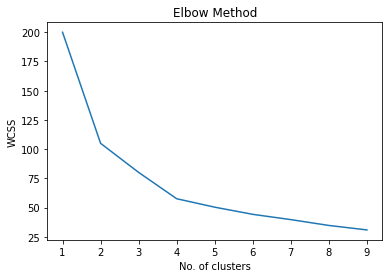

In [49]:
#Need to identify k value
wcss = []
for i in np.arange(1,10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crimedf)
    wcss.append(kmeans.inertia_)
plt.plot(np.arange(1,10),wcss)
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [51]:
#consider K vallue as 5 as no of clusters
clustermodel =KMeans(n_clusters=5,random_state=40)
clustermodel.fit(scaled_crimedf)

KMeans(n_clusters=5, random_state=40)

In [52]:
clustermodel.inertia_#.inertia_ is the sum of avg diffrence btwn the distance with in cluster

50.05119672966492

In [56]:
#bothe gives the same result list of cluster name
clusters=clustermodel.fit_predict(scaled_crimedf)
clusters
#or
clustermodel.labels_

array([4, 0, 0, 1, 0, 0, 3, 1, 0, 4, 3, 2, 0, 1, 2, 1, 1, 4, 2, 0, 3, 0,
       2, 4, 0, 1, 1, 0, 2, 3, 0, 0, 4, 2, 3, 1, 1, 3, 3, 4, 2, 4, 0, 3,
       2, 1, 3, 2, 2, 1])

In [64]:
kmeans_crime_df = crime_df.copy()
kmeans_crime_df['cluster']= clusters
kmeans_crime_df.head()

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [65]:
kmeans_crime_df.groupby('cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
cluster,,,,
0,10.815385,257.384615,76.000000,33.192308
1,6.790909,145.727273,61.636364,19.009091
2,2.680000,70.100000,51.000000,10.910000
3,4.955556,125.444444,80.111111,17.788889
4,14.671429,251.285714,54.285714,21.685714


In [68]:
kmeans_crime_df[kmeans_crime_df.cluster==0]

,State,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
12,Illinois,10.4,249,83,24.0,0
19,Maryland,11.3,300,67,27.8,0
21,Michigan,12.1,255,74,35.1,0
24,Missouri,9.0,178,70,28.2,0
27,Nevada,12.2,252,81,46.0,0
